# Text Mining

## Q1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

## ANSWER:


In [ ]:
#!pip3 install tweepy

In [ ]:
#!pip3 install textblob

In [2]:
# Importing all required library
import re # regular expression
import nltk #The Natural Language Toolkit
import tweepy #very convenient way to access the Twitter API with Python.
import string # special operations on strings
import spacy # language models

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
#Import necessary libaries
import pandas as pd
#Get the data
df=pd.read_csv("Elon_musk.csv", encoding="latin-1")

In [4]:
#Rename the file
df.rename(columns ={'Unnamed: 0':'sr.no'}, inplace=True)

In [5]:
#Let's Display Top five rows
df.head()

,sr.no,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
df['Subjectivity'] = df.Text.apply(calc_subj)
df['Polarity'] = df.Text.apply(calc_pola)

In [7]:
# let's have quick look to our dataset
df.head(10)

,sr.no,Text,Subjectivity,Polarity
0,1,@kunalb11 Im an alien,0.750000,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000
2,3,@joerogan @Spotify Great interview!,0.750000,1.000000
3,4,@gtera27 Doge is underestimated,0.000000,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.727273,0.485227
6,7,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.500000,0.300000
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.500000,0.000000
9,10,The most entertaining outcome is the most likely,0.675000,0.375000


Now we will classify each tweets into different sentiment class which are Positive , Negative and Neutral

In [8]:
#Now let's classify these tweets based on their sentiment(polarity)
def sentiment(ploarity):
    result= ''
    if ploarity > 0:
        result = 'Positive'
    elif ploarity == 0:
        result = 'Neutral'
    else:
        result = 'Negative'
    return result

df['Sentiment'] = df.Polarity.apply(sentiment)
        

In [9]:
df.head()

,sr.no,Text,Subjectivity,Polarity,Sentiment
0,1,@kunalb11 Im an alien,0.750000,-0.250000,Negative
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000,Neutral
2,3,@joerogan @Spotify Great interview!,0.750000,1.000000,Positive
3,4,@gtera27 Doge is underestimated,0.000000,0.000000,Neutral
4,5,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313,Positive


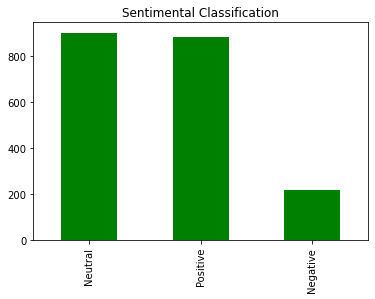

In [10]:
#Let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar',color='green')
plt.title('Sentimental Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

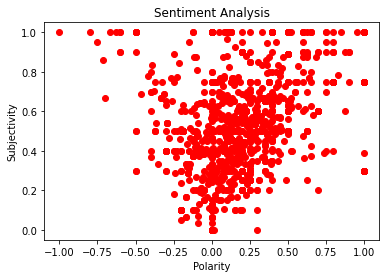

In [11]:
#To Draw Scatter plot
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [12]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()


In [13]:
#Calculating sentiment's
Df_sentiment

,Sentiment,Total
Neutral,45.022511,900
Positive,44.172086,883
Negative,10.805403,216


###  WorldCloud

In [15]:
string_Total = " ".join(df["Text"])

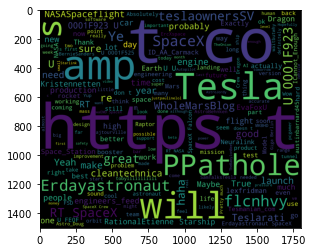

In [16]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)